In [1]:
import intake
import xarray as xr
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

#warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
#from plt import rcParams
plt.rcParams['figure.figsize'] = 10, 4

# CMIP6

In [4]:
# most recent
col_url = "/work/ik1017/Catalogs/mistral-cmip6.json"
col = intake.open_esm_datastore(col_url)

col

In [3]:
!ls /work/ik1017/Catalogs/archive

mistral-cmip62020-08-01.csv.gz	mistral-cmip62020-08-15.csv.gz
mistral-cmip62020-08-02.csv.gz	mistral-cmip62020-08-16.csv.gz
mistral-cmip62020-08-03.csv.gz	mistral-cmip62020-08-17.csv.gz
mistral-cmip62020-08-04.csv.gz	mistral-cmip62020-08-18.csv.gz
mistral-cmip62020-08-05.csv.gz	mistral-cmip62020-08-19.csv.gz
mistral-cmip62020-08-06.csv.gz	mistral-cmip62020-08-20.csv.gz
mistral-cmip62020-08-07.csv.gz	mistral-cmip62020-08-21.csv.gz
mistral-cmip62020-08-08.csv.gz	mistral-cmip62020-08-22.csv.gz
mistral-cmip62020-08-09.csv.gz	mistral-cmip62020-08-23.csv.gz
mistral-cmip62020-08-10.csv.gz	mistral-cmip62020-08-24.csv.gz
mistral-cmip62020-08-11.csv.gz	mistral-cmip62020-08-25.csv.gz
mistral-cmip62020-08-12.csv.gz	mistral-cmip62020-08-26.csv.gz
mistral-cmip62020-08-13.csv.gz	mistral-cmip62020-08-27.csv.gz
mistral-cmip62020-08-14.csv.gz


In [4]:
dates_available = !ls /work/ik1017/Catalogs/archive/mistral-cmip6202*

dates_available = [d.replace('.csv.gz','').replace('/work/ik1017/Catalogs/archive/mistral-cmip6','') for d in dates_available]
dates_available

['2020-08-01',
 '2020-08-02',
 '2020-08-03',
 '2020-08-04',
 '2020-08-05',
 '2020-08-06',
 '2020-08-07',
 '2020-08-08',
 '2020-08-09',
 '2020-08-10',
 '2020-08-11',
 '2020-08-12',
 '2020-08-13',
 '2020-08-14',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18',
 '2020-08-19',
 '2020-08-20',
 '2020-08-21',
 '2020-08-22',
 '2020-08-23',
 '2020-08-24',
 '2020-08-25',
 '2020-08-26',
 '2020-08-27']

In [5]:
dates_used = dates_available[::5]
dates_used

['2020-08-01',
 '2020-08-06',
 '2020-08-11',
 '2020-08-16',
 '2020-08-21',
 '2020-08-26']

In [21]:
#dates_available.remove('2020-06-08')
#dates_available.remove('2020-07-21')

In [ ]:
# from catalogs
dates_used = ['2020-06-01','2020-06-15','2020-06-22','2020-06-25','2020-06-27']
#            from github NCAR/..-datastore # from pymistral/intake-esm
dates_used = ['2019-10-25','2019-11-06',    '2020-03-21'] + dates_available

dates_used

In [6]:
activity_id_size = pd.DataFrame()
dcpp_size = pd.DataFrame()
table_id = ["Amon",'Omon']
for date in dates_used:
    sym_json='/home/mpim/m300524/intake-esm-datastore/catalogs/checking/mistral-cmip6.csv.gz'
    try:
        os.remove(sym_json)
    except:
        pass
    official_file = f'/work/ik1017/Catalogs/archive/mistral-cmip6{date}.csv.gz'
    my_csv_file = f'/home/mpim/m300524/intake-esm-datastore/catalogs/checking/mistral-cmip6{date}.csv.gz'
    if os.path.exists(my_csv_file):
        csv_file = my_csv_file
    elif os.path.exists(official_file):
        csv_file = official_file
    else:
        print(date, 'not found')
        continue

    os.symlink(csv_file, sym_json)

    col_url = "/home/mpim/m300524/intake-esm-datastore/catalogs/checking/mistral-cmip6.json"
    col = intake.open_esm_datastore(col_url)
    print('\n',date,'total files:',col.df.index.size)
    date = pd.to_datetime(date)
    # get overview of files per activity
    activity_id_size[date] = col.df.pivot_table(index=['activity_id'], aggfunc='size')
    
    col_dcpp = col.search(experiment_id="dcppA-hindcast")
    dcpp_variable_size = pd.DataFrame()
    cat = col_dcpp.search(table_id=table_id)
    dcpp_size[date]=cat.df.pivot_table(index=['dcpp_init_year', 'source_id','variable_id'],aggfunc='size')
    
    for variable in ["tas",'tos','fgco2','intpp','sos']:

        for model in cat.df.source_id.unique():
            cat_model = cat.search(source_id=model,variable_id=variable)

            inits = cat_model.df.dcpp_init_year.unique()

            members = cat_model.df.member_id.unique()

            expected = len(inits)*len(members)
            found = cat_model.df.index.size
            #if expected == found:
            #    print(date, variable,table_id,model,'found all expected: ',found)
            #print(date, variable,table_id,model,'found:',found,'expected:',expected)


 2020-08-01 total files: 3879343


/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/intake_esm/core.py:741: UserWarning: Query returned zero results.
  warn(message)



 2020-08-06 total files: 3887035

 2020-08-11 total files: 3898209

 2020-08-16 total files: 3940464

 2020-08-21 total files: 3960425

 2020-08-26 total files: 3961106


In [7]:
import seaborn as sns

In [8]:
sns.set_palette('husl', len(dates_used))

In [9]:
activity_id_size

2020-08-01  2020-08-06  2020-08-11  2020-08-16  2020-08-21  \
activity_id                                                               
AerChemMIP       101720      102122      101901      101901      101901   
C4MIP             83397       83397       83397       83397       83397   
CDRMIP            15044       15044       15044       15044       15044   
CFMIP             38121       38121       38118       38118       38118   
CMIP            1578835     1582578     1587194     1587259     1589117   
DAMIP            171237      171208      171340      171349      171656   
DCPP             286258      286244      286244      286244      286244   
FAFMIP            49597       49597       49597       49597       49597   
GMMIP             11246       11246       11240       11240       11240   
GeoMIP             8206        8206        8206        8206        8206   
HighResMIP       326244      326587      326587      326587      326587   
ISMIP6             3389        3389        3389        3389        3389   
LS3MIP            15037       15036       15036       15036       15036   
LUMIP             59880       59830       59830       59830       59838   
OMIP              16190       16190       16190       16190       16190   
PAMIP            124642      124642      124642      166803      166803   
PMIP              87520       87518       92571       92571       92726   
RFMIP             59380       59375       59375       59375       59404   
ScenarioMIP      843400      846705      848308      848328      865932   

             2020-08-26  
activity_id              
AerChemMIP       101901  
C4MIP             83397  
CDRMIP            15044  
CFMIP             38118  
CMIP            1589310  
DAMIP            171656  
DCPP             286244  
FAFMIP            49597  
GMMIP             11240  
GeoMIP             8206  
HighResMIP       326587  
ISMIP6             3389  
LS3MIP            15036  
LUMIP             59838  
OMIP              16190  
PAMIP            166803  
PMIP              92726  
RFMIP             59420  
ScenarioMIP      866404

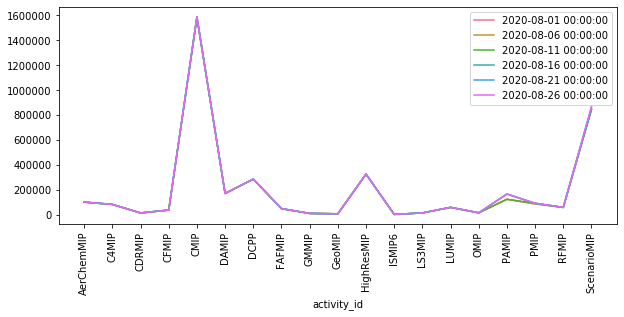

In [10]:
activity_id_size.plot(rot=90, xticks=range(activity_id_size.index.size))

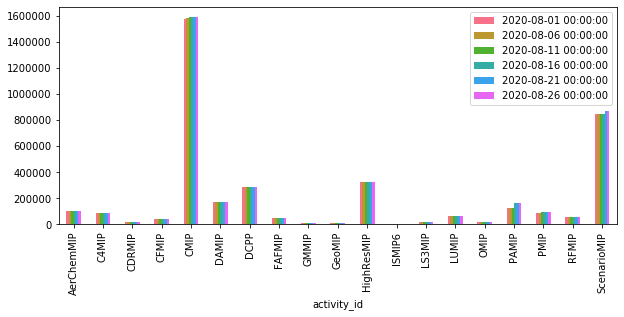

In [11]:
activity_id_size.plot(kind='bar')

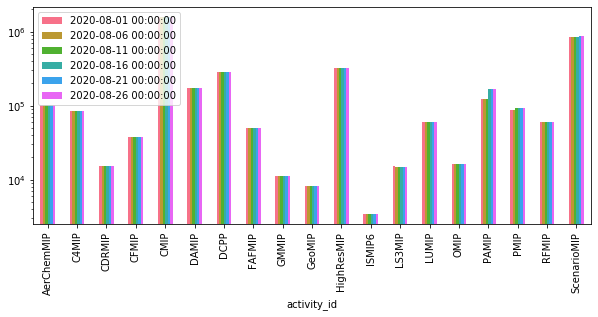

In [12]:
activity_id_size.plot(kind='bar',logy=True)

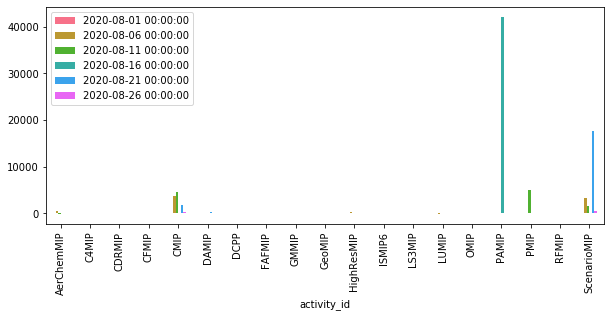

In [13]:
activity_id_size.diff(axis=1).plot(kind='bar')

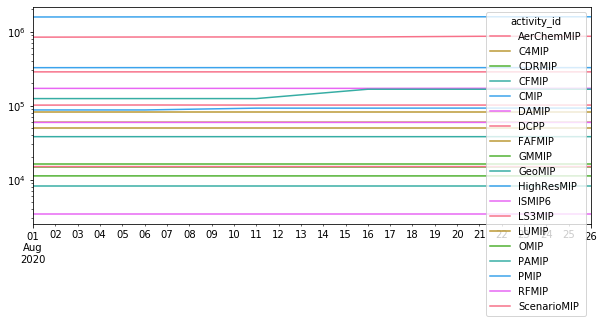

In [14]:
activity_id_size.T.plot(logy=True)

In [16]:
dcpp_size.sum(axis=0).plot(marker='o')

In [17]:
dcpp_size.sum(axis=0)

2020-08-01    69258
2020-08-06    69258
2020-08-11    69258
2020-08-16    69258
2020-08-21    69258
2020-08-26    69258
dtype: int64

## hindcast complete

In [27]:
def hindcast_complete(cat_hind):
    assert (
        len(cat_hind.df.source_id.unique()) == 1
    ), "please provide cat_hind with only one unique source_id"
    nmember = len(cat_hind.df.member_id.unique())
    ninit = len(cat_hind.df.dcpp_init_year.unique())
    print(
        f"Member: {nmember} and Inits: {ninit}: expected {nmember*ninit} files vs found {cat_hind.df.index.size} files"
    )
    if nmember * ninit > cat_hind.df.index.size:
        plot_xinit_ymember(cat_hind)
        return False
    else:
        # plot_xinit_ymember(cat_hind)
        print("success")
        return True

In [28]:
def plot_xinit_ymember(cat):
    assert (
        len(cat.df.source_id.unique()) == 1
    ), "please provide cat_hind with only one unique source_id"
    maxmember = cat.df.member_id.unique().size
    plt.axhline(y=maxmember, c="gray", ls="--", label="Total available")
    cat.df[["dcpp_init_year", "member_id"]].groupby("dcpp_init_year").count().plot(
        label="downloaded", ax=plt.gca()
    )
    plt.ylabel("# Member")
    titlestr = f"model: {cat.df.source_id.unique()[0]}, variable: {cat.df.variable_id.unique()[0]}"
    plt.ylim([0, None])
    plt.title(titlestr)
    plt.legend()
    plt.show()

Member: 10 and Inits: 57: expected 570 files vs found 230 files



 CanESM5 completely downloaded: False 


Member: 8 and Inits: 17: expected 136 files vs found 128 files


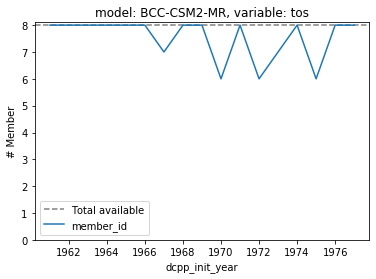


 BCC-CSM2-MR completely downloaded: False 


Member: 5 and Inits: 59: expected 295 files vs found 295 files
success

 MPI-ESM1-2-HR completely downloaded: True 


Member: 20 and Inits: 59: expected 1180 files vs found 375 files


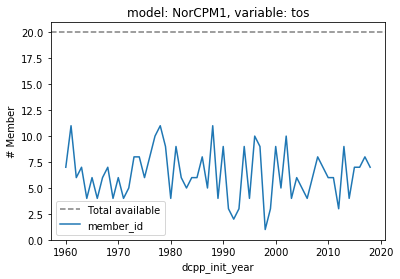


 NorCPM1 completely downloaded: False 




In [29]:
for model in cat_hind.df.source_id.unique():
    print(
        "\n",
        model,
        "completely downloaded:",
        hindcast_complete(cat_hind.search(source_id=model)),'\n\n'
    )